# 分类数据的可视化分析
* 观测点的直接展示：swarmplot, stripplot
* 观测近似分布的展示：boxplot, violinplot
* 均值和置信区间的展示：barplot, pointplot

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(2017)
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

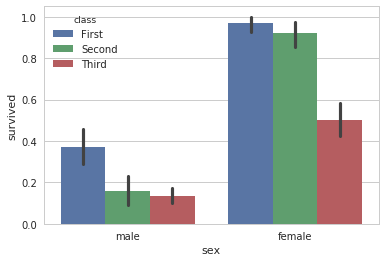

In [2]:
titanic
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

## 分类散点图
当有一维数据是分类数据时，散点图成为了条带形状。

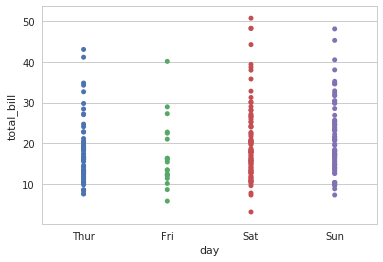

In [2]:
sns.stripplot(x="day", y="total_bill", data=tips)

散点都在一起看不清楚？还记得抖动的方法咩~

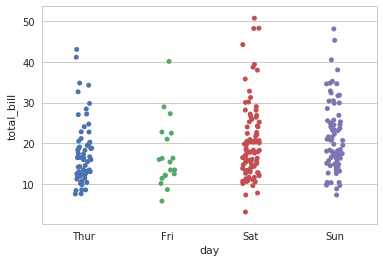

In [3]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

另外一种处理办法，是生成蜂群图，避免散点重叠~

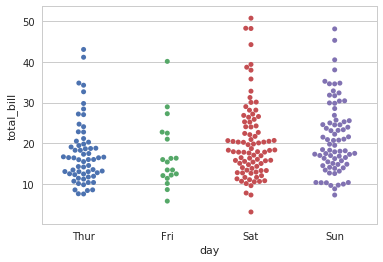

In [4]:
sns.swarmplot(x="day", y="total_bill", data=tips)

在每一个一级分类内部可能存在二级分类

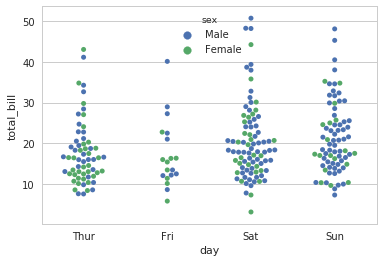

In [5]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

## 分类分布图
### 箱图
上边缘、上四分位数、中位数、下四分位数、下边缘

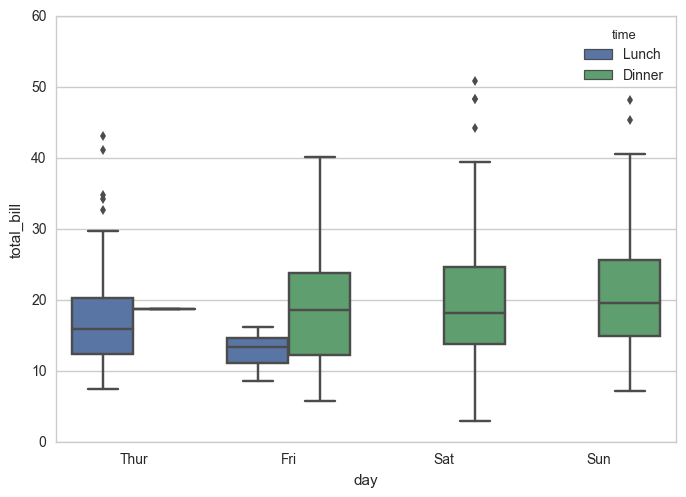

In [12]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### 提琴图
箱图 + KDE(Kernel Distribution Estimation)

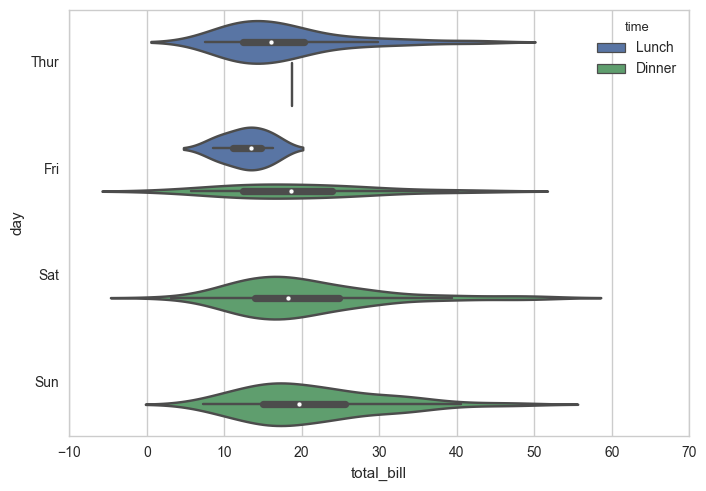

In [13]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

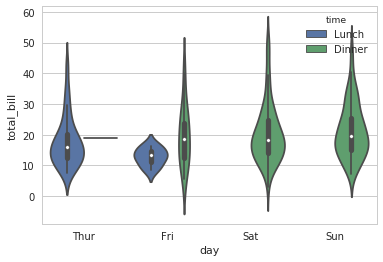

In [4]:
sns.violinplot(x="day", y="total_bill", hue="time", data=tips)

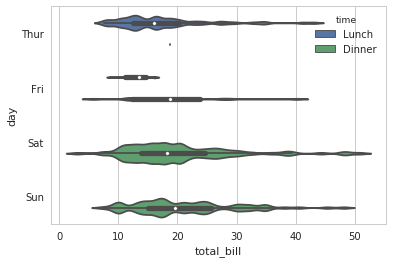

In [15]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)


In [ ]:
# why not is a single violin?

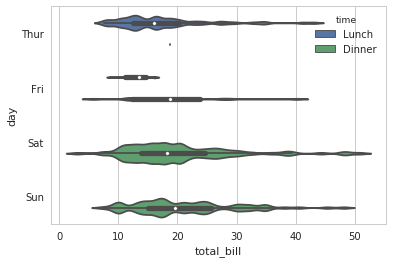

In [16]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)

非对称提琴图

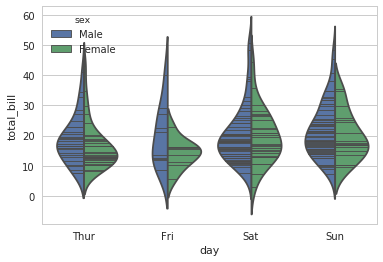

In [5]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="stick")

## 分类统计估计图
### 统计柱状图

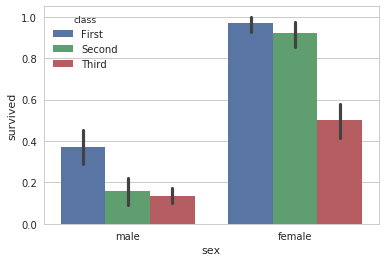

In [8]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

### 灰度柱状图

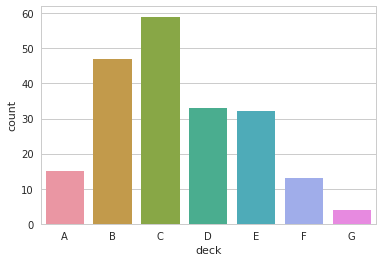

In [9]:
sns.countplot(x="deck", data=titanic)

### 点图

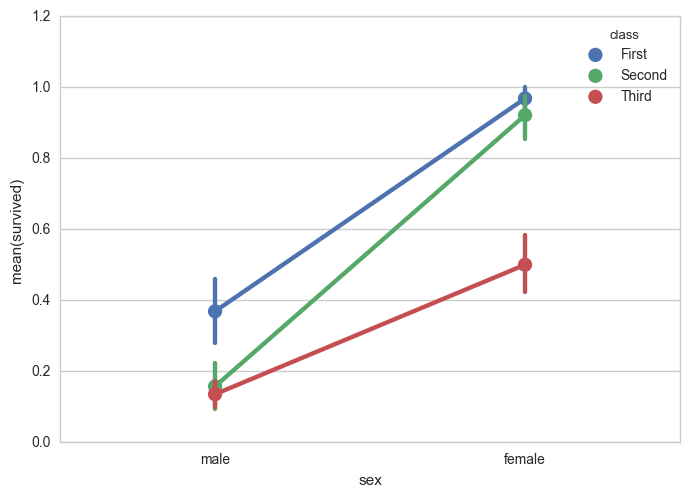

In [29]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

修改颜色、标记、线型

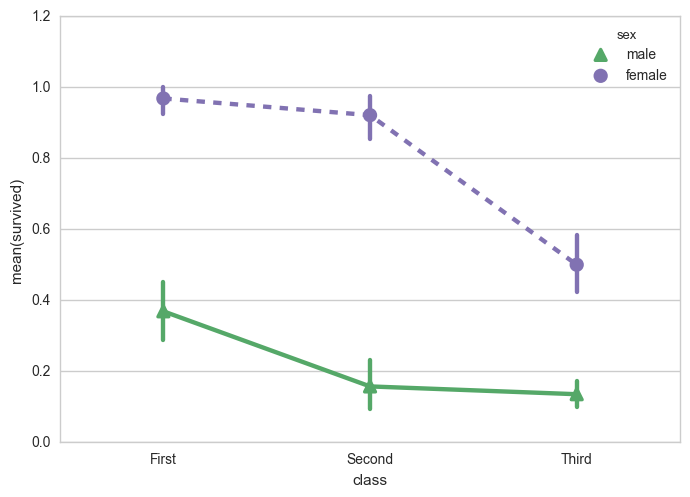

In [30]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

## 分类子图

- 通过factorplot可以绘制出不同类型的图。

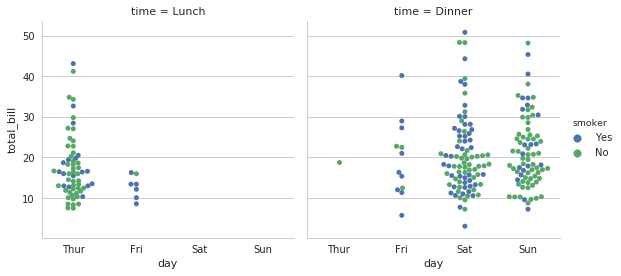

In [6]:
sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm")

多分类标准的子图

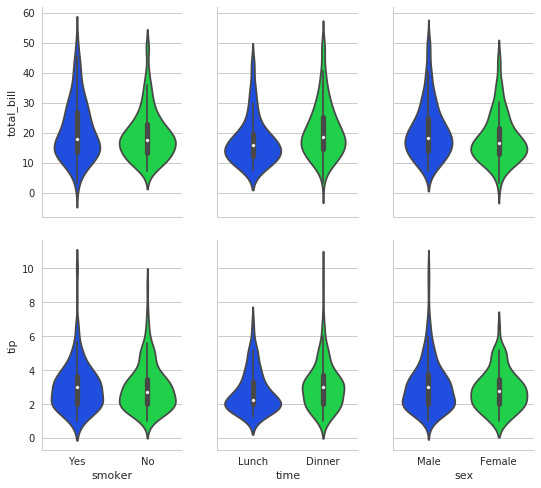

In [8]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
# 对网格中的每一个图做violinplot
g.map(sns.violinplot, palette="bright");